# Sheet 7

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F

## 2 Log-sum-exp and soft(arg)max
(b)

In [9]:
sigmas = np.array([[1, 2, 3], [11, 12, 13], [10, 20, 30]])

sigma1 = np.exp(sigmas[0])/ np.sum(np.exp([sigmas[0]]))
sigma2 = np.exp(sigmas[1])/ np.sum(np.exp([sigmas[1]]))
sigma3 = np.exp(sigmas[2])/ np.sum(np.exp([sigmas[2]]))

print(sigma1, sigma2, sigma3)

[0.09003057 0.24472847 0.66524096] [0.09003057 0.24472847 0.66524096] [2.06106005e-09 4.53978686e-05 9.99954600e-01]


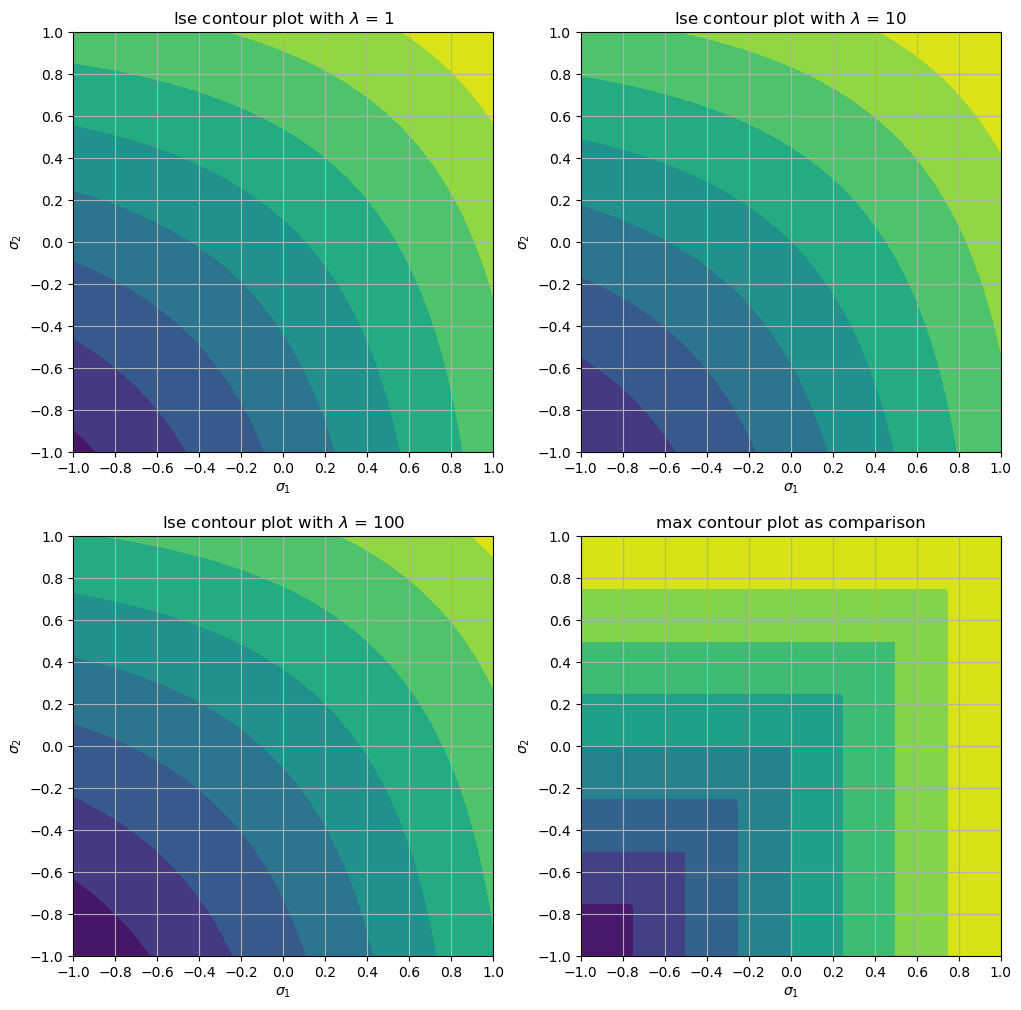

In [93]:
def logsumexp(x, lamb=1):
    # TODO: implement the logsumexp
    return (1/lamb) * np.log(np.sum(np.exp(lamb*x)))
    

# TODO: set up a grid of points in [-1, 1] x [-1, 1]
x = np.linspace(-1, 1, 101)
y = np.linspace(-1, 1, 101)
X, Y = np.meshgrid(x,y)

# TODO: I recommend you set up a function to set up an Axes object with the correct x, y labels, 
#       equal aspect and maybe x and y ticks.

def set_up_axes(ax):
    ax.set_xlabel("$\sigma_1$")
    ax.set_ylabel("$\sigma_2$")
    ax.set_aspect('equal')
    ax.set_xticks(np.linspace(-1, 1, 11))
    ax.set_yticks(np.linspace(-1, 1, 11))
  
    
# TODO: calculate and plot the functions as specified in the task
lambdas = [1, 10, 100]

fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# evaluating the functions and plotting them
for (k,l), ax in zip(enumerate(lambdas), axs.flatten()):
    Z = np.empty(X.shape)
    Z_max = np.empty(Z.shape)
    for i in range(len(x)):
        for j in range(len(y)):
            Z[i,j] = logsumexp((X[i,j],Y[i,j]), l)
            Z_max[i,j] = np.max((X[i,j],Y[i,j]))
    
    # plotting the lse contour 
    ax.contourf(X, Y, Z)
    set_up_axes(ax)
    ax.set_title("lse contour plot with $\lambda$ = " + str(l))
    ax.grid()
    
    
#plotting the max contour
axs[1,1].contourf(X, Y, Z_max)
set_up_axes(axs[1,1])
axs[1,1].set_title("max contour plot as comparison")
axs[1,1].grid()


The higher $\lambda$ gets, the more the contour plot deviates from the max contourplot. It becomes smoother.

(c)

In [94]:
def softmax(x, ax, lamb=1):
    # TODO: implement the softmax function. Axis should specify along which axis the sums should be computed.
    e_x = np.exp(x - np.max(lamb * x, axis=ax))
    return e_x / np.sum(lamb * e_x, axis=ax)

# TODO: compute the argmax of each gridpoint in one-hot form
onehot_argmax = to_onehot(np.argmax(xy, axis=-1))

# TODO: make the plots as specified on the sheet (nicest is in a grid which you can get using plt.subplots)

# plot the softmax
fig, axs = plt.subplots(2, 4, figsize=(17, 7))
        
# plot the onehot argmax


NameError: name 'to_onehot' is not defined

## 3 Linear regions of MLPs

(a)

In [96]:
class Abs(nn.Module):
    """Absolute value activation function. You can experiment with this instead of ReLU."""
    def forward(self, x):
        return x.abs()
    
    
# define NN architecture.
class MLPShallow(nn.Module):
    def __init__(self):
        super(MLPShallow).__init__()
        # TODO: initialize Linear Layers and the activation as specified on the sheet
        self.linlay1 = nn.Linear(20, 1)
        
        
    def forward(self, x):
        # TODO: pass the input x through the layers and return the output
        output = self.fc2(x)
        return output
 

The model has 40 trainable parameters, each of the 20 neurons has one weight and its bias. 

(b)

In [110]:
def visualize_model(model, res=500, bound=5):
    # TODO: implement a function that takes the model (the MLP), and builds a 
    #       grid of points in [-bound, bound] x [-bound, bound], passes them 
    #       through the model and returns the result in the shape of an image
    x = np.linspace(-bound, bound, res+1)
    X,Y = np.meshgrid(x,x)
    
    random_data = torch.rand((1, 1, res, res))
    print(random_data)
    
    #print(X[-1, -1], Y[-1,-1])
    output = model(random_data)
    
    
    
print(visualize_model(None))


# TODO: instantiate the model and make the visualizations as requested in the task
# NOTE: If you get a constant output, you got an unlucky initialization. Simply reinitialize the model.

RuntimeError: Trying to create tensor with negative dimension -5: [-5, 5, 500, 500]

In [113]:
import torch

class ShallowModel(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(ShallowModel, self).__init__()
        self.fc1 = torch.nn.Linear(input_size, hidden_size)
        self.fc2 = torch.nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        return x

# Define model hyperparameters
input_size = 10
hidden_size = 20
output_size = 5

# Create model
model = ShallowModel(input_size, hidden_size, output_size)

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

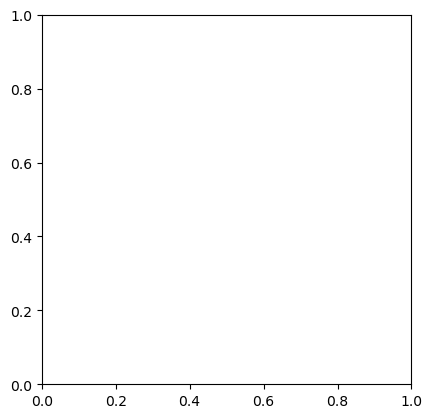

In [115]:
import matplotlib.pyplot as plt

def visualize_model(model, res=500, bound=5):
    # Create grid of points in the range [-bound, bound]
    x = torch.linspace(-bound, bound, res)
    y = torch.linspace(-bound, bound, res)
    x_grid, y_grid = torch.meshgrid(x, y)

    # Flatten grid of points
    input_points = torch.stack([x_grid, y_grid], dim=-1)
    input_points = input_points.reshape(-1, 2)

    # Compute model output for each input point
    output = model(input_points)

    # Reshape output to match grid shape
    output = output.reshape(res, res)

    # Plot output as an image
    plt.imshow(output, extent=[-bound, bound, -bound, bound])
    plt.show()

# Define model hyperparameters
input_size = 2
hidden_size = 20
output_size = 1

# Create model
model = ShallowModel(input_size, hidden_size, output_size)

# Visualize model output
visualize_model(model, res=500, bound=10)


(c)

In [ ]:
# TODO: compute the spatial gradient of the network outputs (as an image) from (b)
#       using np.gradient, and visualize using matplotlib's prism colormap


(d)

In [ ]:
# define NN architecture.
class MLPDeep(nn.Module):
    def __init__(self):
        super().__init__()
        # TODO: initialize Linear Layers and the activation as specified on the sheet
        
        
    def forward(self, x):
        # TODO: pass the input x through the layers and return the output

# TODO: repeat the visualizations from above
